In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=1, random_state=1)
data2, label2 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=5, random_state=1)

Let's split the datasets into train and test.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data1, label1, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, label2, test_size=0.2)


Plot the first dataset with standard deviation 1.

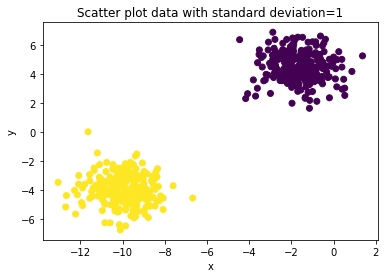

In [0]:
plt.scatter(data1[:,0], data1[:,1], c=label1)
plt.title('Scatter plot data with standard deviation=1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 4.

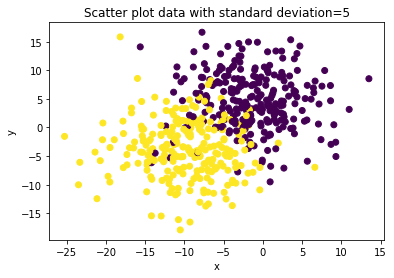

In [0]:
plt.scatter(data2[:,0], data2[:,1], c=label2)
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [0]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



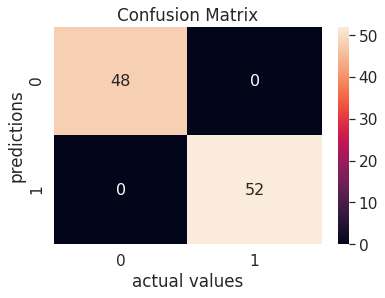

In [0]:
# Predict
import seaborn as sn
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(X_test),y_test))
cm = pd.DataFrame(confusion_matrix(y_test,GNB.predict(X_test)), range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

plt.ylabel('predictions')
plt.xlabel('actual values')
plt.title('Confusion Matrix')

plt.show()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



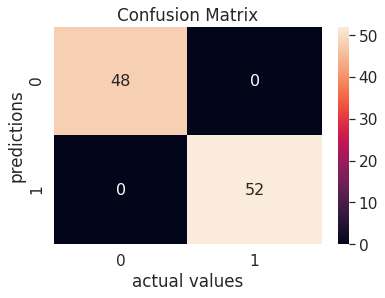

In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(X_test),y_test))
cm = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test)), range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

plt.ylabel('predictions')
plt.xlabel('actual values')
plt.title('Confusion Matrix')
plt.show()

### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [0]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train2, y_train2)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.89      0.89      0.89        53

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



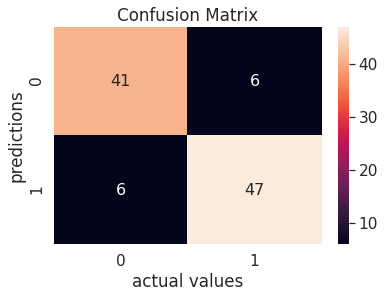

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(X_test2),y_test2))
cm = pd.DataFrame(confusion_matrix(y_test2,GNB.predict(X_test2)), range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

plt.ylabel('predictions')
plt.xlabel('actual values')
plt.title('Confusion Matrix')
plt.show()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.91      0.91      0.91        53

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



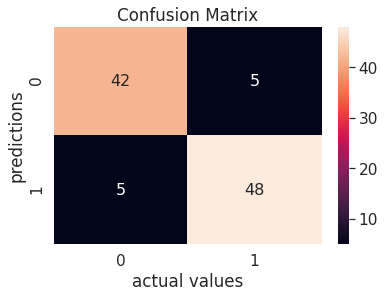

In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(X_test2),y_test2))
cm = pd.DataFrame(confusion_matrix(y_test2,clf.predict(X_test2)), range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

plt.ylabel('predictions')
plt.xlabel('actual values')
plt.title('Confusion Matrix')
plt.show()

### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
df=pd.read_json("/content/drive/My Drive/News_Category_Dataset_v2.json", lines = True)

## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [0]:
new_df['category'].value_counts()

POLITICS         8088
WELLNESS         4450
ENTERTAINMENT    3992
TRAVEL           2428
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']

### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(lowercase=True, stop_words='english')
X_train_counts = count_vect.fit_transform(X)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tf = tfidf_transformer.fit_transform(X_train_counts)

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split
train_data = X_train_tf[:4*(X_train_tf.shape[0]//5),:]
test_data = X_train_tf[4*(X_train_tf.shape[0]//5):,:]

train_label = y[:4*(X_train_tf.shape[0]//5)]
test_label = y[4*(X_train_tf.shape[0]//5):]


### Gaussian Naive Bayesian

In [0]:
from sklearn.naive_bayes import GaussianNB
NewGNB = GaussianNB()
NewGNB.fit(train_data.toarray(), train_label)

GaussianNB(priors=None, var_smoothing=1e-09)

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1557
           1       0.68      0.69      0.68       839
           2       0.71      0.65      0.68       875
           3       0.61      0.59      0.60       523

    accuracy                           0.71      3794
   macro avg       0.69      0.68      0.68      3794
weighted avg       0.71      0.71      0.71      3794

0.7090142329994729


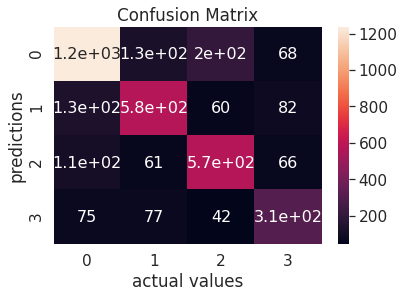

In [0]:
# Predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report for Naive Bayesian:")
print(classification_report(NewGNB.predict(test_data.toarray()), test_label))
print(accuracy_score(NewGNB.predict(test_data.toarray()),test_label))
cm = pd.DataFrame(confusion_matrix(test_label,NewGNB.predict(test_data.toarray())), range(4), range(4))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

plt.ylabel('predictions')
plt.xlabel('actual values')
plt.title('Confusion Matrix')
plt.show()

### 6) Logistic Regression

In [0]:
clf = LogisticRegression(random_state=0)
clf.fit(train_data, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1759
           1       0.91      0.88      0.89       881
           2       0.83      0.88      0.86       760
           3       0.74      0.95      0.83       394

    accuracy                           0.89      3794
   macro avg       0.86      0.90      0.88      3794
weighted avg       0.90      0.89      0.89      3794

0.8924617817606747


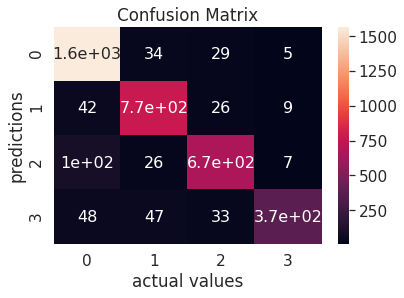

In [0]:
# Predict
>>> from sklearn.metrics import accuracy_score
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(test_data),test_label))
print(accuracy_score(clf.predict(test_data),test_label))
cm = pd.DataFrame(confusion_matrix(test_label,clf.predict(test_data)), range(4), range(4))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

plt.ylabel('predictions')
plt.xlabel('actual values')
plt.title('Confusion Matrix')
plt.show()

### Observe Logistic Regression is much slower but more accurate. Discuss.

We observed that Logistic Regression worked much slower than Gaussian Naive Bayesian.

However, we have obtained much better accuracy, precision and recall scores with Logistic Regression than Gaussian Naive Bayesian.

We have obtained the best results with the Logistic Regression, giving an accuracy of 0.8924617817606747

We have obtained the second best results with the Gaussian Naive Bayesian, giving an accuracy of 0.7090142329994729